In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv3D, MaxPooling3D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
np.random.seed(7)

In [2]:
#Iz foldera C:\Jupyter projects\Fruit recognition izvlacimo slike i ubacujemo ih u listu sa naznakom o kom vocu se radi.
#Pratimo proces tako sto ispisujemo svaki 10000. ucitani podatak

import pandas as pd
import os
images = []

dirp = 'C:\Jupyter projects\Fruit recognition'
cou = 0
for fruit in os.listdir(dirp):
    for im in os.listdir(dirp+"\\"+fruit):
        if not (('total' in im) or ('Total' in im)) and 'png' in im: 
            images += [[fruit, dirp+"\\"+fruit+"\\"+im] ]
            cou += 1
            if (cou % 10000 == 0):
                print(dirp+"\\"+fruit+"\\"+im)
        elif not (('total' in im) or ('Total' in im)):
            for subim in os.listdir(dirp + "\\" + fruit + "\\" + im):
                images += [[fruit, dirp + "\\" + fruit + "\\" + im+"\\"+subim]]
                cou += 1
                if (cou % 10000 == 0):
                    print(dirp+"\\"+fruit+"\\"+im+"\\"+subim)

#Pravimo dejtafrejm sa putanjama i imenima voca uz dodavanje oznake za svako voce                    
                    
df = pd.DataFrame(images, columns = ["fruit", "path"])
fruit_names = sorted(df.fruit.unique())
mapper_fruit_names = dict(zip(fruit_names, [t for t in range(len(fruit_names))]))
print (mapper_fruit_names)
df["label"] = df["fruit"].map(mapper_fruit_names)
df

C:\Jupyter projects\Fruit recognition\Carambola\Carambola 001729.png
C:\Jupyter projects\Fruit recognition\Mango\Mango00217.png
C:\Jupyter projects\Fruit recognition\Peach\Peach00484.png
C:\Jupyter projects\Fruit recognition\Plum\PlumπÇé59.png
{'Apple': 0, 'Banana': 1, 'Carambola': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Orange': 6, 'Peach': 7, 'Pear': 8, 'Persimmon': 9, 'Pitaya': 10, 'Plum': 11, 'Pomegranate': 12, 'Tomatoes': 13, 'muskmelon': 14}


fruit                                               path  label
0         Apple  C:\Jupyter projects\Fruit recognition\Apple\Ap...      0
1         Apple  C:\Jupyter projects\Fruit recognition\Apple\Ap...      0
2         Apple  C:\Jupyter projects\Fruit recognition\Apple\Ap...      0
3         Apple  C:\Jupyter projects\Fruit recognition\Apple\Ap...      0
4         Apple  C:\Jupyter projects\Fruit recognition\Apple\Ap...      0
...         ...                                                ...    ...
44787  Tomatoes  C:\Jupyter projects\Fruit recognition\Tomatoes...     13
44788  Tomatoes  C:\Jupyter projects\Fruit recognition\Tomatoes...     13
44789  Tomatoes  C:\Jupyter projects\Fruit recognition\Tomatoes...     13
44790  Tomatoes  C:\Jupyter projects\Fruit recognition\Tomatoes...     13
44791  Tomatoes  C:\Jupyter projects\Fruit recognition\Tomatoes...     13

[44792 rows x 3 columns]

In [3]:
#Podela na trening i test skup

from sklearn.model_selection import train_test_split

num_rows = len(df.index)

df = df.sample(frac = 1.0)

X_path = df['path']
y = df['label']

X_train_path, X_test_path, y_train_old, y_test_old = train_test_split(X_path, y, test_size=0.2, random_state=7, stratify=y)

import cv2

X_train = []
X_test = []
y_train = []
y_test = []

#Prelazak sa putanja slika do samih slika koje su skalirane kako bi radili sa vecim skupom podataka

for i in range(num_rows):
    if i%1000 == 0:
            print(str(i)+":")
    if i in X_train_path:
        X_train.append( cv2.resize(plt.imread(X_train_path[i]), (100, 100) ) )
        y_train.append(y_train_old[i])
    elif i in X_test_path:
        X_test.append( cv2.resize(plt.imread(X_test_path[i]), (100, 100)))
        y_test.append(y_test_old[i])

0:
1000:
2000:
3000:
4000:
5000:
6000:
7000:
8000:
9000:
10000:
11000:
12000:
13000:
14000:
15000:
16000:
17000:
18000:
19000:
20000:
21000:
22000:
23000:
24000:
25000:
26000:
27000:
28000:
29000:
30000:
31000:
32000:
33000:
34000:
35000:
36000:
37000:
38000:
39000:
40000:
41000:
42000:
43000:
44000:


[32995, 2062, 21157, 12064, 980, 31874, 17290, 20179, 26870, 4506, 35584, 2658, 21236, 4163, 4711, 23255, 11683, 17382, 17121, 10027]


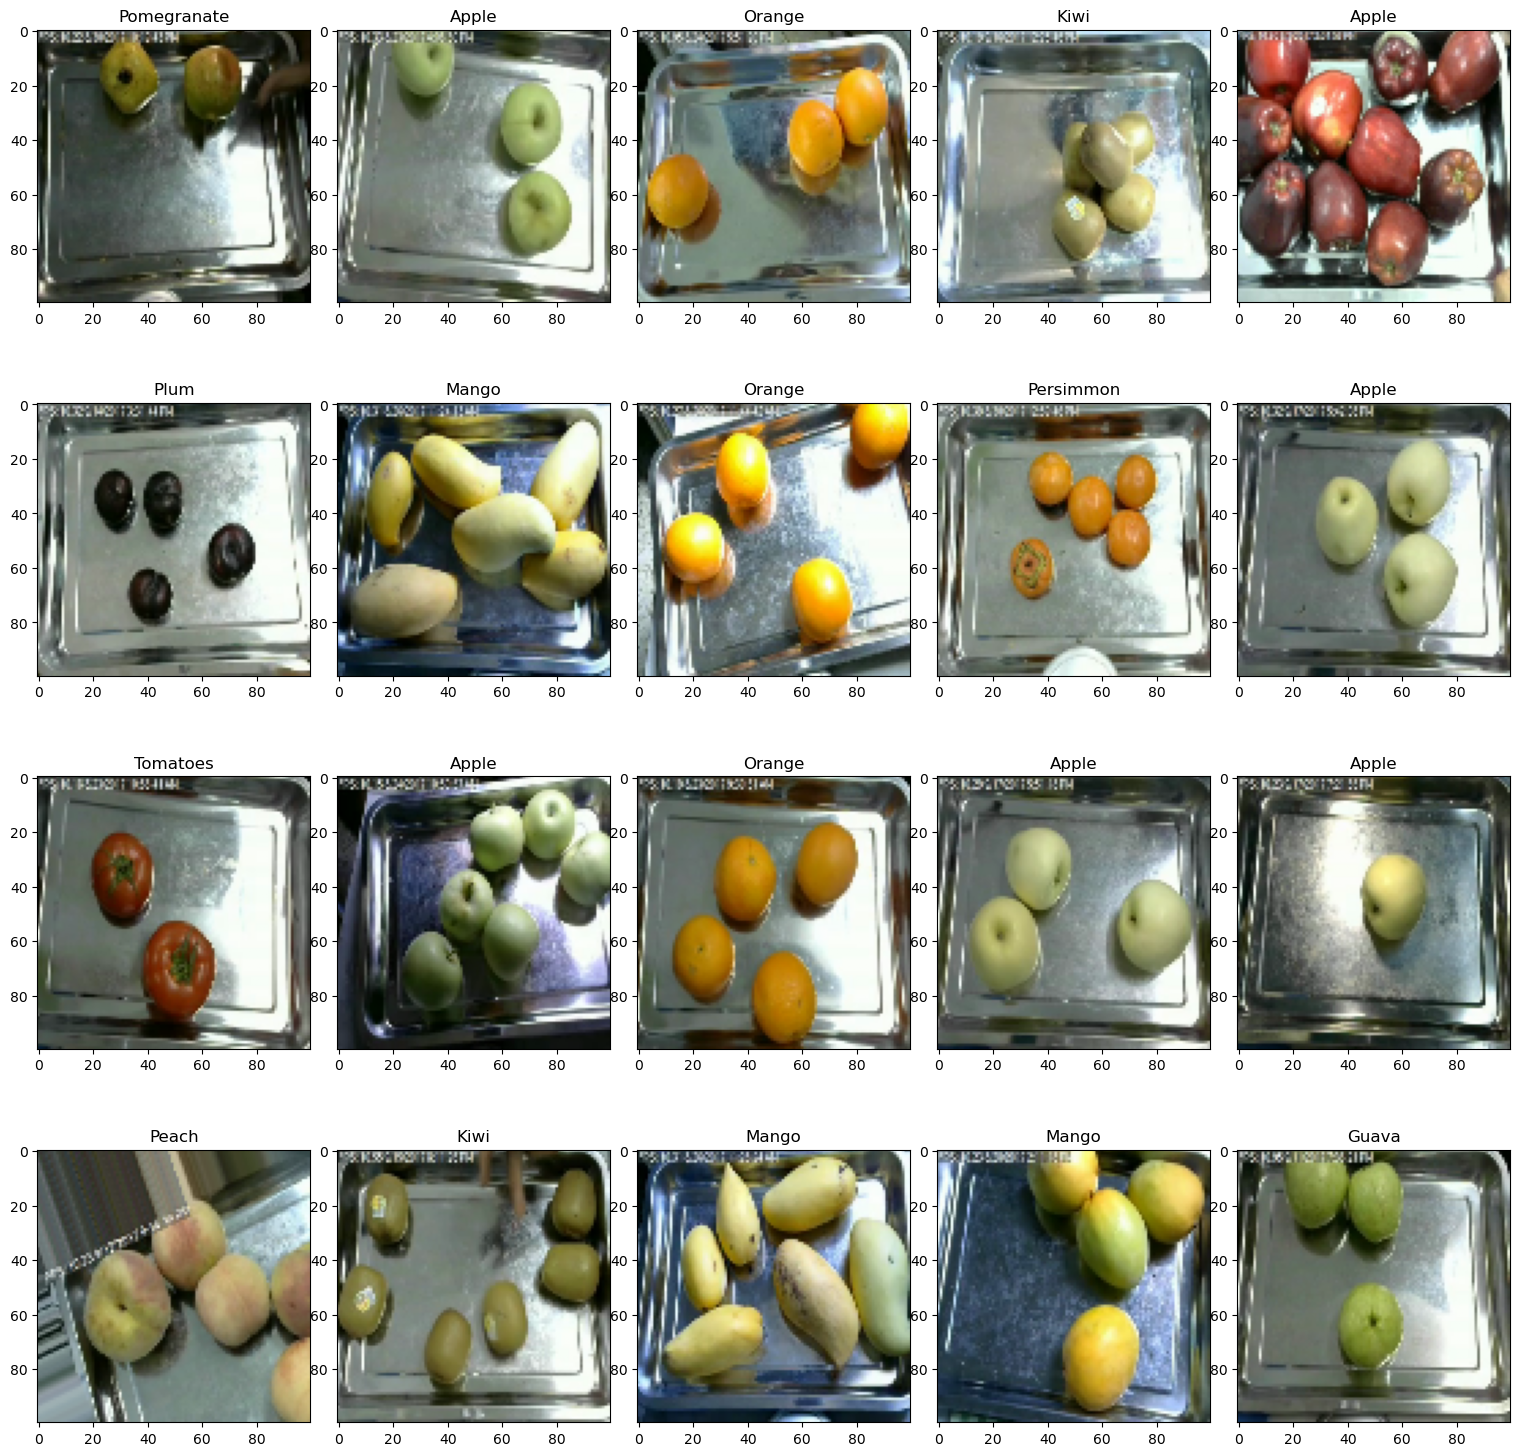

In [4]:
#Prikazujemo 20 proizvoljnih slika

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15))

import random

random20 = random.choices(range(len(X_train)), k=20)
print(random20)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random20[i]]);
    ax.set_title( fruit_names[  y_train[random20[i]]  ]   , fontsize = 12)
plt.tight_layout(pad=0.0)
plt.show()


In [5]:
#Prilagodjavamo oblik ulaznih podataka u neuralnu mrezu

img_rows = 100
img_cols = 100

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=7, stratify=y_train)

X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    X_valid = X_valid.reshape(X_valid.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 3)    
    input_shape = (img_rows, img_cols, 3)

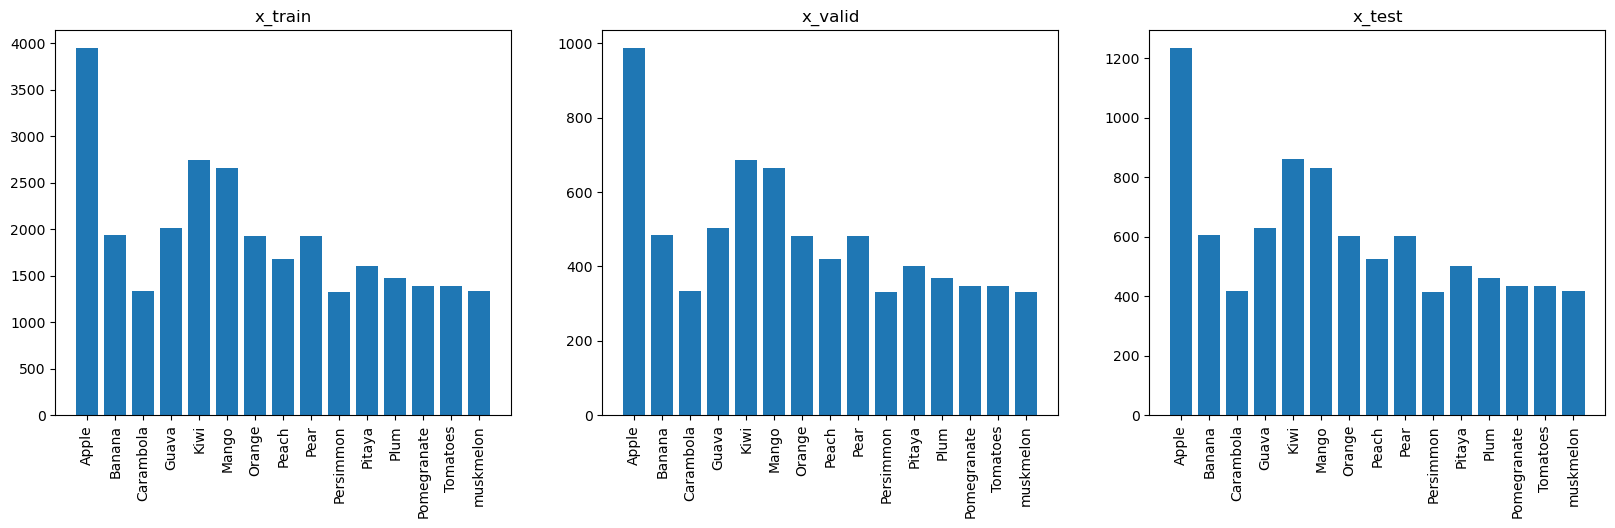

In [6]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.xticks( range(len(fruit_names)), fruit_names, rotation = 'vertical')
plt.title ('x_train')

plt.bar( [i for i in range(15)], np.bincount(y_train))

plt.subplot(1,3,2)
plt.xticks( range(len(fruit_names)), fruit_names, rotation = 'vertical')
plt.title ('x_valid')

plt.bar( [i for i in range(15)], np.bincount(y_valid))

plt.subplot(1,3,3)
plt.xticks( range(len(fruit_names)), fruit_names, rotation = 'vertical')
plt.title ('x_test')

plt.bar( [i for i in range(15)], np.bincount(y_test))


plt.show()


In [7]:
#X_train = X_train.astype('float32')
print(X_train[0])

[[[0.2314353  0.26038826 0.26051372]
  [0.27625883 0.3037098  0.3037098 ]
  [0.2887451  0.31227452 0.3079412 ]
  ...
  [0.4637647  0.4755294  0.45819607]
  [0.47819608 0.48211765 0.4721059 ]
  [0.52436477 0.5511137  0.56096077]]

 [[0.2506863  0.2639098  0.27630588]
  [0.74016476 0.7651451  0.7700863 ]
  [0.5248824  0.5572745  0.5437647 ]
  ...
  [0.44754902 0.49162748 0.49307844]
  [0.5414863  0.57474124 0.58940786]
  [0.5181138  0.5450275  0.5540902 ]]

 [[0.24733333 0.2844706  0.28266668]
  [0.68498045 0.71243143 0.71243143]
  [0.43470588 0.46166667 0.4597059 ]
  ...
  [0.5821569  0.6331373  0.6542157 ]
  [0.6118628  0.65911764 0.6988628 ]
  [0.43294117 0.4647255  0.51029414]]

 ...

 [[0.652451   0.7422549  0.8077059 ]
  [0.7489412  0.8312941  0.93745095]
  [0.54313725 0.6310785  0.7280392 ]
  ...
  [0.3612745  0.3614706  0.3501961 ]
  [0.35750982 0.36554903 0.34633335]
  [0.37886274 0.383      0.37419608]]

 [[0.443851   0.52126276 0.64108235]
  [0.47841176 0.55582356 0.6675137 ]


In [8]:
#regularizer = regularizers.l2(l=0.01)

In [9]:
#Pravimo model

model = Sequential([
    Input(shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'),
    Dropout(0.25),
    Flatten(),
    Dense(96, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')
])




In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        1

In [11]:
#Treniramo model

model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
batch_size = 128
epochs = 32

y_train = utils.to_categorical(y_train, 15)
y_valid = utils.to_categorical(y_valid, 15)
y_test = utils.to_categorical(y_test, 15)

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Epoch 1/32
224/224 [==============================] - 872s 4s/step - loss: 1.2372 - accuracy: 0.5935 - val_loss: 0.3067 - val_accuracy: 0.8995
Epoch 2/32
224/224 [==============================] - 862s 4s/step - loss: 0.3901 - accuracy: 0.8657 - val_loss: 0.1583 - val_accuracy: 0.9453
Epoch 3/32
224/224 [==============================] - 861s 4s/step - loss: 0.2669 - accuracy: 0.9083 - val_loss: 0.1392 - val_accuracy: 0.9480
Epoch 4/32
224/224 [==============================] - 867s 4s/step - loss: 0.2089 - accuracy: 0.9273 - val_loss: 0.0995 - val_accuracy: 0.9605
Epoch 5/32
224/224 [==============================] - 858s 4s/step - loss: 0.1721 - accuracy: 0.9399 - val_loss: 0.1139 - val_accuracy: 0.9572
Epoch 6/32
224/224 [==============================] - 865s 4s/step - loss: 0.1370 - accuracy: 0.9519 - val_loss: 0.0865 - val_accuracy: 0.9657
Epoch 7/32
224/224 [==============================] - 859s 4s/step - loss: 0.1244 - accuracy: 0.9574 - val_loss: 0.0766 - val_accuracy: 0.9685

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

y_predicted = model.predict(X_test)
y_predicted_classes = np.argmax(y_predicted, axis = 1) 

y_test_classes = np.argmax(y_test, axis = 1) 

confusion_matrix= confusion_matrix(y_test_classes, y_predicted_classes)

report = classification_report(y_test_classes, y_predicted_classes)

280/280 [==============================] - 84s 286ms/step


In [13]:
print(confusion_matrix)
print(report)
print(mapper_fruit_names)

[[1219    2    0    0    0    0    0    0    0    0    0    0    0    0
    11]
 [   2  600    0    0    0    0    0    0    0    0    0    0    3    0
     1]
 [   0    0  416    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0  628    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0  859    0    0    0    0    0    0    0    0    0
     0]
 [   1   18    0    0    0  808    1    0    0    0    0    0    3    0
     0]
 [   0    0    0    0    0    0  602    0    0    0    0    0    0    0
     0]
 [   9    0    0    0    0    0    0  510    1    0    4    0    0    2
     0]
 [  27    8    0    0    0    0    0    1  557    0    0    0    2    0
     7]
 [   0    1    0    0    0    0    3    0    0  409    0    0    1    0
     0]
 [   0    0    0    0    0    0    0    0    0    0  500    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0  460    0    0
     0]
 [   2   28    0    0    0    1    0    

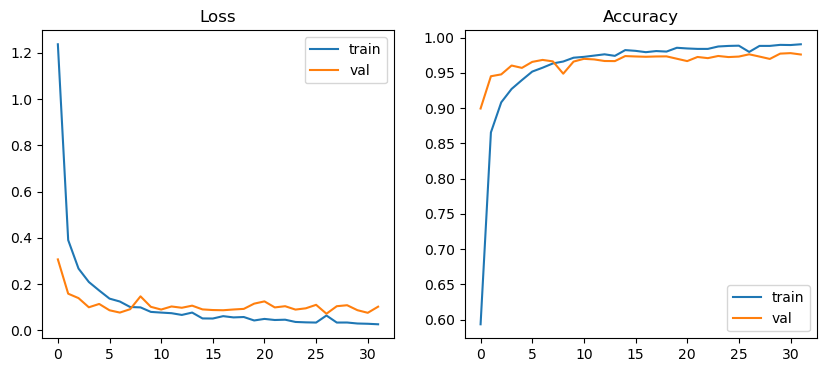

In [14]:
#Grafici gubitka i preciznosti

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(np.arange(0, epochs), history.history['loss'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='val')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(np.arange(0, epochs), history.history['accuracy'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'], label='val')
plt.legend(loc='best')

plt.show()

In [29]:
#Cuvamo model

from tensorflow.keras.models import load_model

model.save('fruit_recognition.model')

loaded_model = load_model('fruit_recognition.model')



#import pickle

#model_filename = 'C:\Jupyter projects\Fruit recognition\models\fruit_recognition.model'
#with open(model_filename, 'wb') as pickle_file:
    #pickle.dump(model, pickle_file)
    


INFO:tensorflow:Assets written to: fruit_recognition.model\assets


INFO:tensorflow:Assets written to: fruit_recognition.model\assets


In [30]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        1

In [31]:
#Pokrecemo model

loaded_model.predict(X_test[[0,1]])

1/1 [==============================] - 3s 3s/step


array([[1.00000000e+00, 8.15953510e-20, 1.50536898e-31, 4.22274377e-26,
        7.51900944e-35, 9.75680530e-31, 3.69228727e-33, 2.87724751e-17,
        5.07246487e-19, 7.32020005e-32, 1.39668971e-18, 1.81624310e-32,
        1.21658685e-29, 1.69503711e-18, 1.87842790e-24],
       [1.00000000e+00, 3.96283897e-30, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.86334608e-27,
        2.04383408e-32, 0.00000000e+00, 9.61451996e-24, 0.00000000e+00,
        0.00000000e+00, 2.38455123e-30, 0.00000000e+00]], dtype=float32)

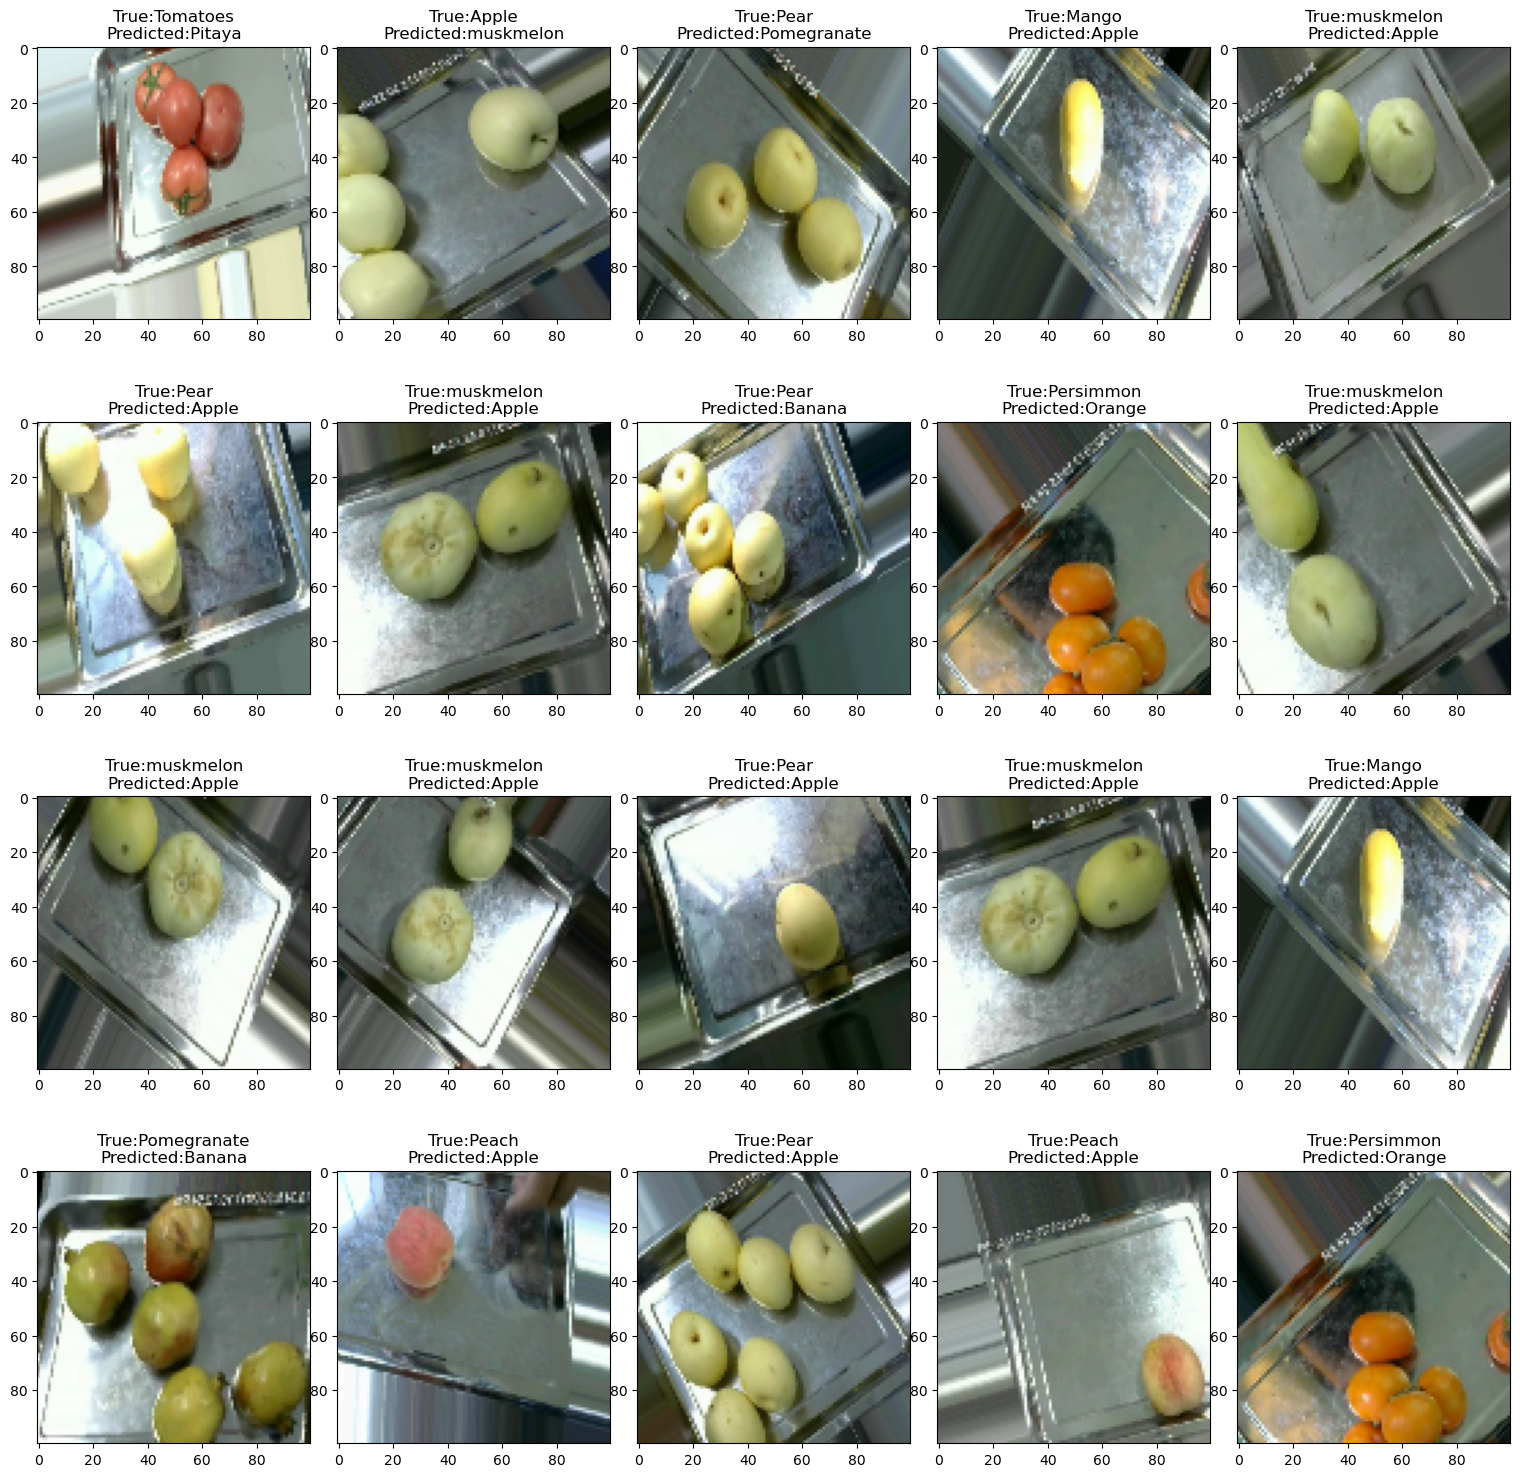

In [59]:
#Prikazujemo slike na kojima model gresi

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15))

wrongs=[]
for i in range(len(y_test)):
    if (np.argmax(y_test[i]) != np.argmax(y_predicted[i]) ):
        wrongs.append([i])

random20 = random.choices(range(len(wrongs)), k=20)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[wrongs[random20[i]][0] ]);
    ax.set_title( 'True:'+ fruit_names[np.argmax(y_test[wrongs[random20[i]][0]])] +'\nPredicted:'+ fruit_names[np.argmax(y_predicted[wrongs[random20[i]][0]])],fontsize = 12)
plt.tight_layout(pad=0.0)
plt.show()